In [13]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
df = pd.read_csv(r'D:/2016-FCC-New-Coders-Survey-Data.csv', sep=',', low_memory=False)

In [14]:
df

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15615,39.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,bachelor's degree,Chemistry,NaN
15616,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Electrical Engineering,NaN
15617,37.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Chemistry,NaN
15618,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,master's degree (non-professional),Math,NaN


In [16]:
df=df[['EmploymentField','EmploymentStatus','Gender','LanguageAtHome','SchoolDegree','Income']]

In [17]:
df

,EmploymentField,EmploymentStatus,Gender,LanguageAtHome,SchoolDegree,Income
0,office and administrative support,Employed for wages,male,English,"some college credit, no degree",32000.0
1,food and beverage,Employed for wages,male,English,"some college credit, no degree",15000.0
2,finance,Employed for wages,male,English,high school diploma or equivalent (GED),48000.0
3,"arts, entertainment, sports, or media",Employed for wages,female,English,bachelor's degree,43000.0
4,education,Employed for wages,female,Khmer,"some college credit, no degree",6000.0
...,...,...,...,...,...,...
15615,software development and IT,Self-employed freelancer,male,Swahili,bachelor's degree,10000.0
15616,software development and IT,Employed for wages,male,Hindi,bachelor's degree,10000.0
15617,NaN,Self-employed freelancer,male,English,bachelor's degree,48000.0
15618,education,Self-employed freelancer,male,NaN,master's degree (non-professional),10000.0


In [18]:
df=df.dropna()
df=df[(df.Gender=='male') | (df.Gender=='female')]

In [19]:
df

,EmploymentField,EmploymentStatus,Gender,LanguageAtHome,SchoolDegree,Income
0,office and administrative support,Employed for wages,male,English,"some college credit, no degree",32000.0
1,food and beverage,Employed for wages,male,English,"some college credit, no degree",15000.0
2,finance,Employed for wages,male,English,high school diploma or equivalent (GED),48000.0
3,"arts, entertainment, sports, or media",Employed for wages,female,English,bachelor's degree,43000.0
4,education,Employed for wages,female,Khmer,"some college credit, no degree",6000.0
...,...,...,...,...,...,...
15613,software development and IT,Employed for wages,male,English,"trade, technical, or vocational training",200000.0
15614,finance,Employed for wages,male,English,"trade, technical, or vocational training",26000.0
15615,software development and IT,Self-employed freelancer,male,Swahili,bachelor's degree,10000.0
15616,software development and IT,Employed for wages,male,Hindi,bachelor's degree,10000.0


In [35]:
svyazi=[['Gender','SchoolDegree'],['EmploymentField','LanguageAtHome'],['EmploymentStatus','LanguageAtHome']]
for i in svyazi:
    print(i[0]+' x '+i[1],end='\n\n')
    print(pd.crosstab(df[i[0]],df[i[1]],margins=True),end='\n\n\n')
import scipy.stats
for i in svyazi:
    print(i[0]+' x '+i[1],end='\n\n')
 
    print(scipy.stats.contingency.expected_freq(pd.crosstab(df[i[0]],df[i[1]],margins=False)),end='\n\n\n')
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
stats=importr('stats')
for i in svyazi:
    print(i[0]+' x '+i[1],end='\n\n')
 
    print(stats.fisher_test(np.array(pd.crosstab(df[i[0]],df[i[1]],margins=False).values), simulate_p_value = True),end='\n\n\n')

Gender x SchoolDegree

SchoolDegree  Ph.D.  associate's degree  bachelor's degree  \
Gender                                                       
female           16                  43                647   
male             64                 271               2249   
All              80                 314               2896   

SchoolDegree  high school diploma or equivalent (GED)  \
Gender                                                  
female                                             47   
male                                              382   
All                                               429   

SchoolDegree  master's degree (non-professional)  \
Gender                                             
female                                       184   
male                                         604   
All                                          788   

SchoolDegree  no high school (secondary school)  \
Gender                                            
female           

ModuleNotFoundError: No module named 'rpy2'

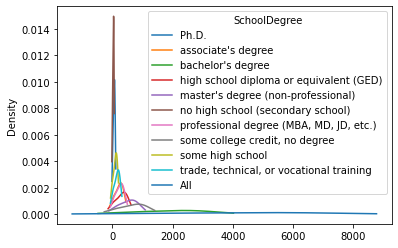

<Figure size 432x288 with 0 Axes>

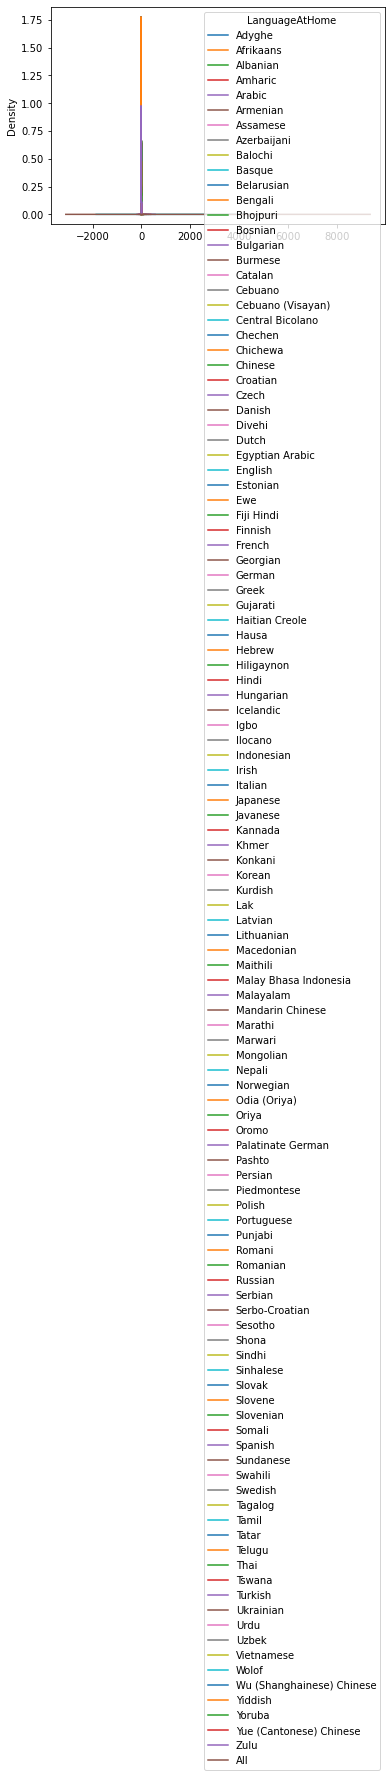

<Figure size 432x288 with 0 Axes>

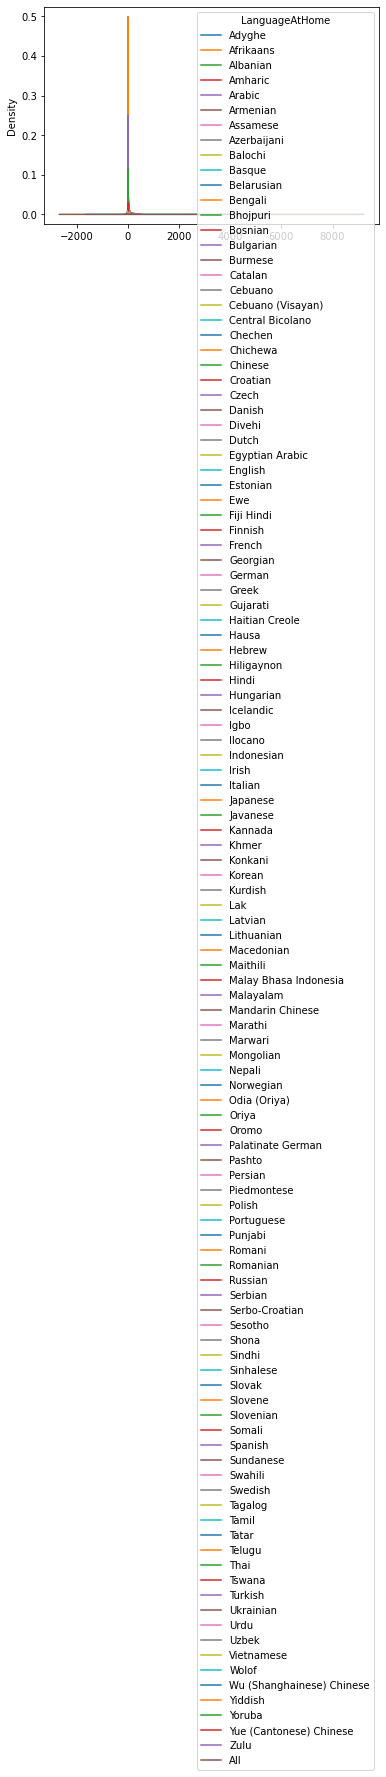

<Figure size 432x288 with 0 Axes>

In [23]:
for i in svyazi:
    pd.crosstab(df[i[0]],df[i[1]],margins=True).plot(kind='kde')
    plt.figure()

In [24]:
a,b=df.Income.quantile([0.33,0.66])[[0.33,0.66]]
df.Income=df.Income.apply(lambda x: 'высокий' if x>b else 'средний' if x>a 
else 'низкий')

In [32]:
import scipy

<AxesSubplot:ylabel='Density'>

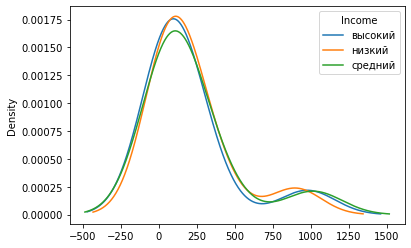

In [39]:
pd.crosstab(df.SchoolDegree,df.Income,margins=True)
pd.crosstab(df.SchoolDegree,df.Income,margins=False).plot(kind='kde')